In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Setting Whitegrid as white
%matplotlib inline
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading xlsx FILE
df = pd.read_excel('/content/drive/My Drive/Project_Seminar/TrainUKSocial.xlsx')

In [5]:
#CHECKING DATA IN TABULATED FORM
df.head()

,Unnamed: 0,Unnamed: 0.1,Keywords,Years,Months,impact_blog,impact_forum,impact_news,impact_review,impact_twitter,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive,full text,hashtags,media urls,country,trend,category
0,0,60,Algae,2015,4,0.0,628.5,0.0,43.8,3429.2,194,0,40,64,506,['Our weird world. The Sulfur & Algae fields o...,"['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]...","['[]', ""[u'http://goo.gl/fb/lketzQ']"", '[]', '...",UK,trend,xcat
1,1,61,Algae,2015,5,13.4,415.9,46.6,0.0,471.3,25,0,11,16,132,"[""Quote: Originally Posted by Gunnar45 Well, t...","['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]...","['[]', '[]', '[]', ""[u'http://weburbanist.com/...",UK,trend,xcat
2,2,62,Algae,2015,6,16.5,249.3,64.8,0.0,315.5,17,0,15,14,78,['Glory charles.: Green Algae on thr rise in t...,"['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]...","[""[u'http://glorycharles.blogspot.com/2012/08/...",UK,trend,xcat
3,3,63,Algae,2015,7,0.0,321.8,44.7,0.0,728.4,32,0,7,8,81,['Enormous Algae bloom turns Turkish salt lake...,"['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]...","[""[u'http://pbs.twimg.com/media/CKU2rsRVEAAtIP...",UK,trend,xcat
4,4,64,Algae,2015,8,24.5,2049.7,318.2,0.0,1095.3,72,0,32,29,245,"['...reached the massive buoy, which is used t...","['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]...","['[]', '[]', '[]', '[]', ""[u'http://dlvr.it/Bt...",UK,trend,xcat


In [6]:
#No Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9853 non-null   int64  
 1   Unnamed: 0.1        9853 non-null   int64  
 2   Keywords            9853 non-null   object 
 3   Years               9853 non-null   int64  
 4   Months              9853 non-null   int64  
 5   impact_blog         9853 non-null   float64
 6   impact_forum        9853 non-null   float64
 7   impact_news         9853 non-null   float64
 8   impact_review       9853 non-null   float64
 9   impact_twitter      9853 non-null   float64
 10  twitter retweets    9853 non-null   int64  
 11  instagram likes     9853 non-null   int64  
 12  sentiment_negative  9853 non-null   int64  
 13  sentiment_neutral   9853 non-null   int64  
 14  sentiment_positive  9853 non-null   int64  
 15  full text           9853 non-null   object 
 16  hashta

In [7]:
#No Missing value
GMM = df

In [8]:
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9853 non-null   int64  
 1   Unnamed: 0.1        9853 non-null   int64  
 2   Keywords            9853 non-null   object 
 3   Years               9853 non-null   int64  
 4   Months              9853 non-null   int64  
 5   impact_blog         9853 non-null   float64
 6   impact_forum        9853 non-null   float64
 7   impact_news         9853 non-null   float64
 8   impact_review       9853 non-null   float64
 9   impact_twitter      9853 non-null   float64
 10  twitter retweets    9853 non-null   int64  
 11  instagram likes     9853 non-null   int64  
 12  sentiment_negative  9853 non-null   int64  
 13  sentiment_neutral   9853 non-null   int64  
 14  sentiment_positive  9853 non-null   int64  
 15  full text           9853 non-null   object 
 16  hashta

In [9]:
# Drop the 'Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags' and 'media urls' columns
GMM.drop(['Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            9853 non-null   object 
 1   Years               9853 non-null   int64  
 2   Months              9853 non-null   int64  
 3   impact_blog         9853 non-null   float64
 4   impact_forum        9853 non-null   float64
 5   impact_news         9853 non-null   float64
 6   impact_review       9853 non-null   float64
 7   impact_twitter      9853 non-null   float64
 8   twitter retweets    9853 non-null   int64  
 9   instagram likes     9853 non-null   int64  
 10  sentiment_negative  9853 non-null   int64  
 11  sentiment_neutral   9853 non-null   int64  
 12  sentiment_positive  9853 non-null   int64  
 13  country             9853 non-null   object 
 14  trend               9853 non-null   object 
 15  category            9853 non-null   object 
dtypes: flo

In [10]:
# converting to binary data with column trend
GMM1 = pd.get_dummies(GMM, columns=['trend'])
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            9853 non-null   object 
 1   Years               9853 non-null   int64  
 2   Months              9853 non-null   int64  
 3   impact_blog         9853 non-null   float64
 4   impact_forum        9853 non-null   float64
 5   impact_news         9853 non-null   float64
 6   impact_review       9853 non-null   float64
 7   impact_twitter      9853 non-null   float64
 8   twitter retweets    9853 non-null   int64  
 9   instagram likes     9853 non-null   int64  
 10  sentiment_negative  9853 non-null   int64  
 11  sentiment_neutral   9853 non-null   int64  
 12  sentiment_positive  9853 non-null   int64  
 13  country             9853 non-null   object 
 14  category            9853 non-null   object 
 15  trend_nontrend      9853 non-null   uint8  
 16  trend_

In [11]:
GMM2 = GMM1.rename(columns = {'trend_trend': 'trend', 'trend_nontrend': 'nontrend'}, inplace = False)
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            9853 non-null   object 
 1   Years               9853 non-null   int64  
 2   Months              9853 non-null   int64  
 3   impact_blog         9853 non-null   float64
 4   impact_forum        9853 non-null   float64
 5   impact_news         9853 non-null   float64
 6   impact_review       9853 non-null   float64
 7   impact_twitter      9853 non-null   float64
 8   twitter retweets    9853 non-null   int64  
 9   instagram likes     9853 non-null   int64  
 10  sentiment_negative  9853 non-null   int64  
 11  sentiment_neutral   9853 non-null   int64  
 12  sentiment_positive  9853 non-null   int64  
 13  country             9853 non-null   object 
 14  category            9853 non-null   object 
 15  nontrend            9853 non-null   uint8  
 16  trend 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


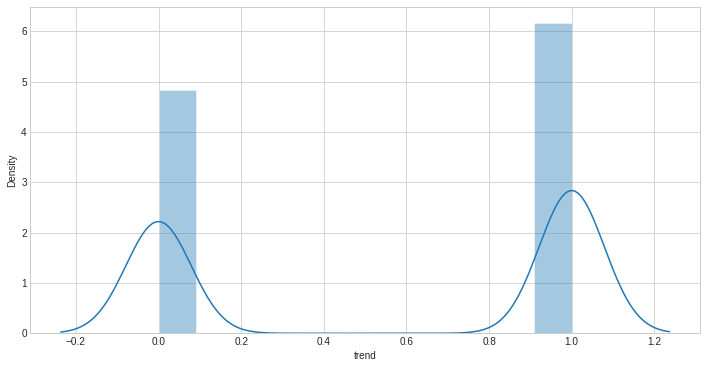

In [ ]:
#Checking Distribution for all the dependent variable  
sns.distplot(GMM2['trend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


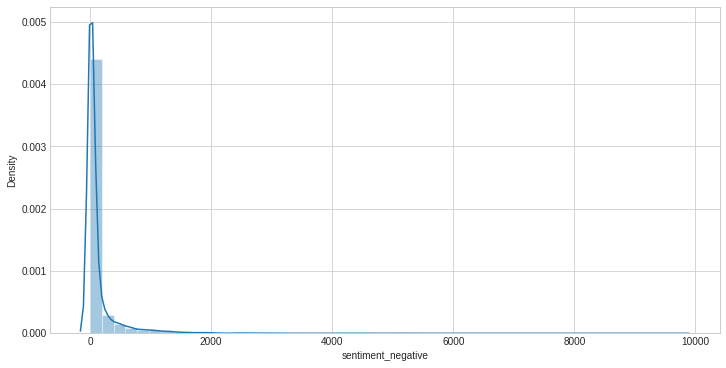

In [ ]:
#Checking Distribution for some other variable - Sentiment
sns.distplot(GMM2['sentiment_negative'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


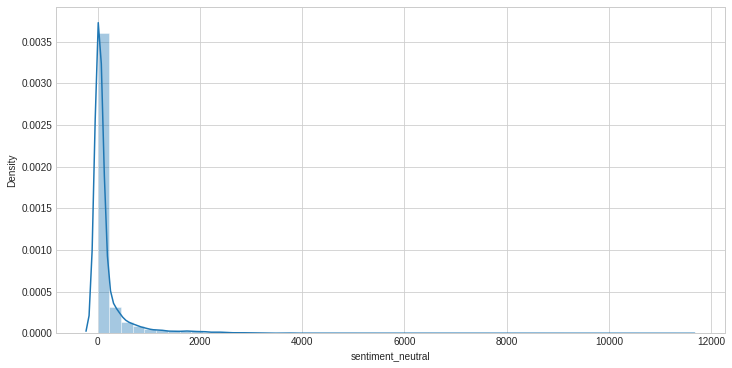

In [ ]:
#Checking Distribution for some other variable - Sentiment
sns.distplot(GMM2['sentiment_neutral'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


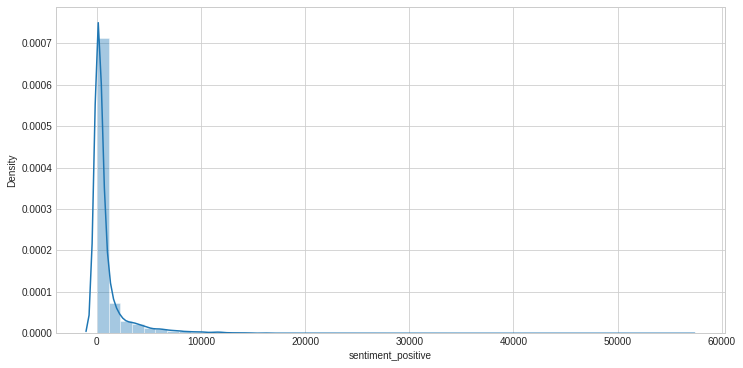

In [ ]:
#Checking Distribution for some other variable - Sentiment
sns.distplot(GMM2['sentiment_positive'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


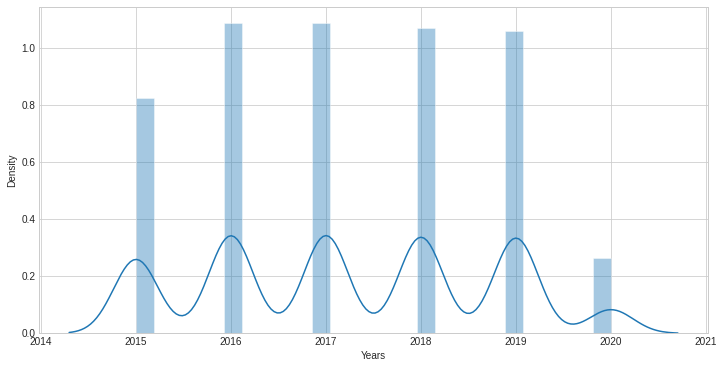

In [ ]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['Years'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


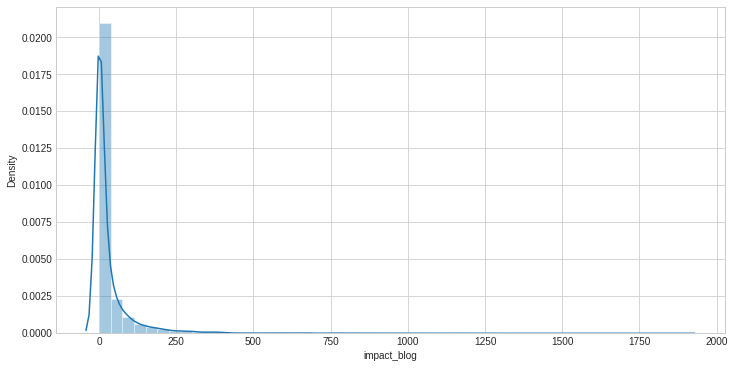

In [ ]:
#Checking Distribution for some other variable -
sns.distplot(GMM2['impact_blog'])

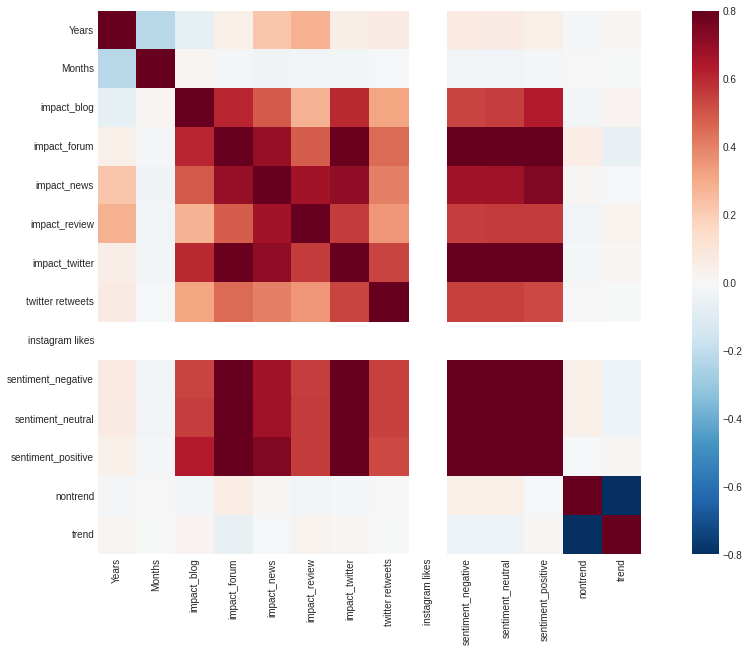

In [ ]:
#correlation matrix for variables
corrmat = GMM2.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

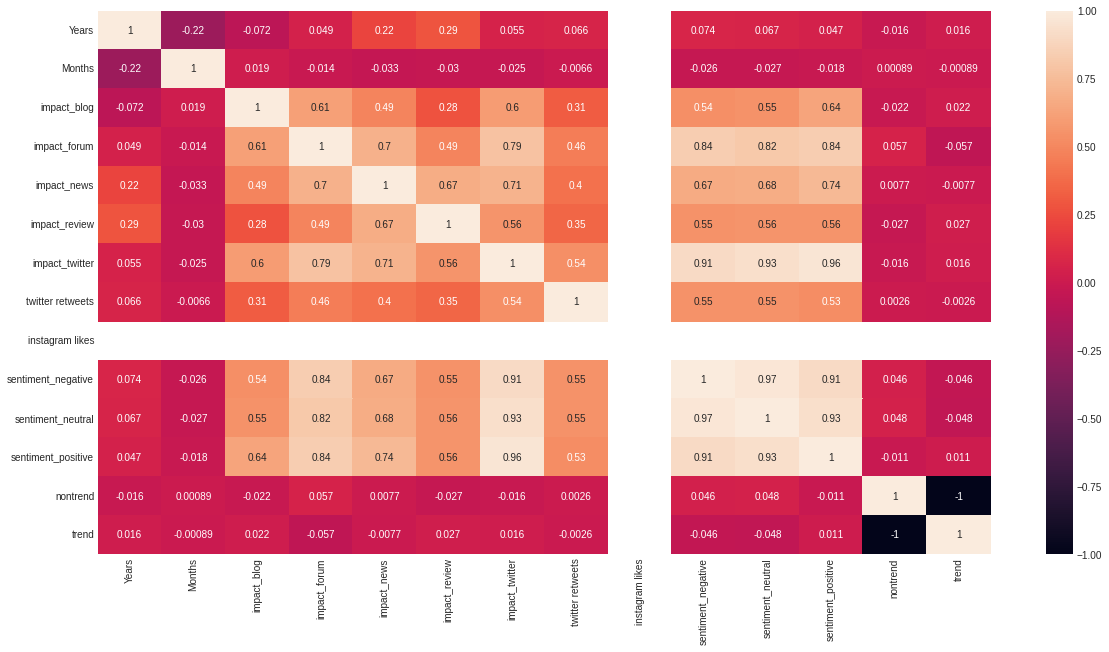

In [ ]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(GMM2.corr(), annot=True) 

In [ ]:
#Creating List of Variable
my_list = list(GMM2)
print (my_list)

['Keywords', 'Years', 'Months', 'impact_blog', 'impact_forum', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'country', 'category', 'nontrend', 'trend']


In [ ]:
#scatter plots
cols = ['Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_instagram', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']
sns.pairplot(GMM2[cols], height = 2.5)
plt.show()

In [ ]:
#check features correlated with trend
corrmat['trend'].sort_values(ascending=False)

trend                 1.000000
impact_review         0.027436
impact_blog           0.022073
Years                 0.015785
impact_twitter        0.015694
sentiment_positive    0.011409
Months               -0.000889
twitter retweets     -0.002634
impact_news          -0.007704
sentiment_negative   -0.045706
sentiment_neutral    -0.047625
impact_forum         -0.056850
nontrend             -1.000000
instagram likes            NaN
Name: trend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


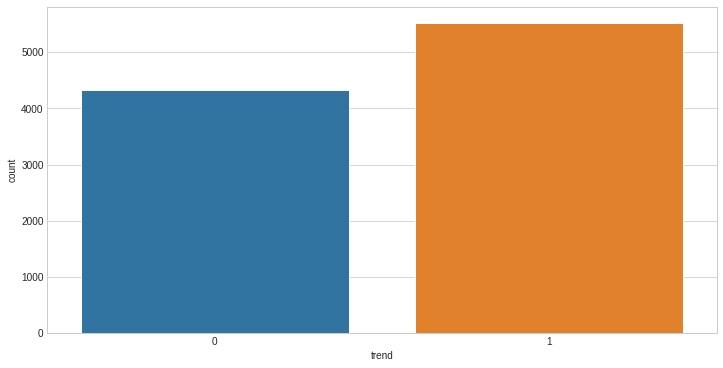

In [ ]:
#Counting Trend and Non Trend Number
sns.countplot(GMM2['trend'], label = "Count")

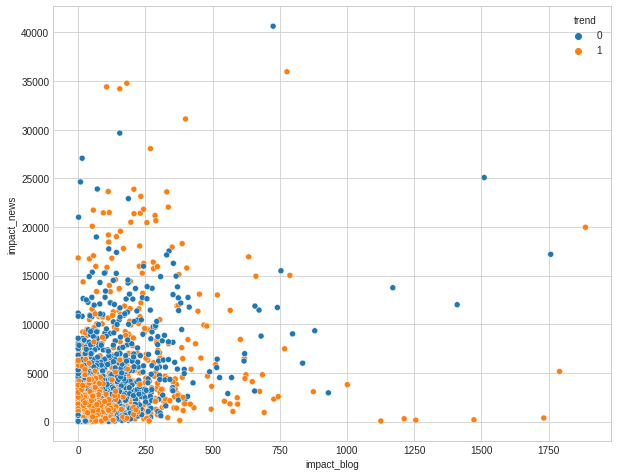

In [ ]:
#Checking trend with impact_blog and impact_news
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_blog', y = 'impact_news', hue = 'trend', data = GMM2)

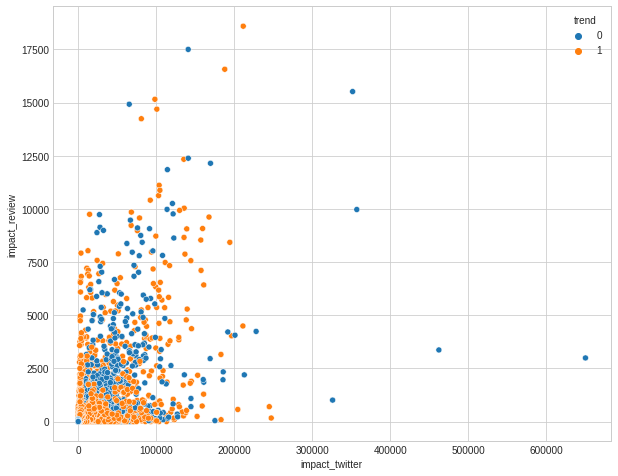

In [ ]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_twitter', y = 'impact_review', hue = 'trend', data = GMM2)

In [ ]:
#EVERYTHING IS GOOD HERE##

In [12]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (9853, 12)
'y' shape: (9853,)


In [13]:
X_train = X
y_train = y

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [16]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 227, 1061],
       [ 120, 1548]])

Text(0.5, 384.16, 'Predicted label')

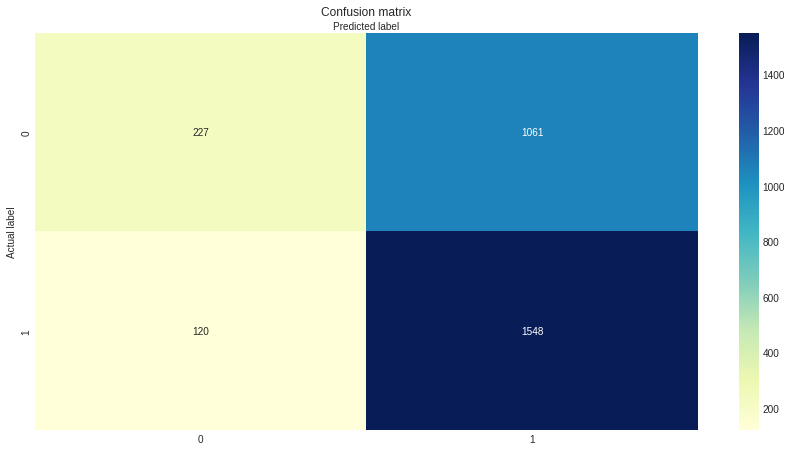

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6004736129905277
Precision: 0.5933307780758912
Recall: 0.9280575539568345


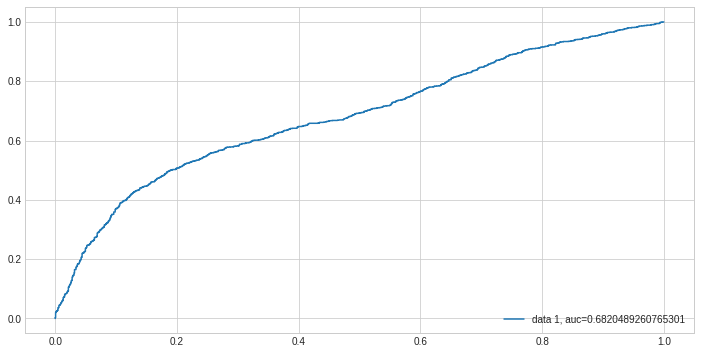

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [20]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

In [21]:
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            9853 non-null   object 
 1   Years               9853 non-null   int64  
 2   Months              9853 non-null   int64  
 3   impact_blog         9853 non-null   float64
 4   impact_forum        9853 non-null   float64
 5   impact_news         9853 non-null   float64
 6   impact_review       9853 non-null   float64
 7   impact_twitter      9853 non-null   float64
 8   twitter retweets    9853 non-null   int64  
 9   instagram likes     9853 non-null   int64  
 10  sentiment_negative  9853 non-null   int64  
 11  sentiment_neutral   9853 non-null   int64  
 12  sentiment_positive  9853 non-null   int64  
 13  country             9853 non-null   object 
 14  category            9853 non-null   object 
 15  nontrend            9853 non-null   uint8  
 16  trend 

In [22]:
X

,Years,Months,impact_blog,impact_forum,impact_news,impact_review,impact_twitter,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
0,2015,4,0.0,628.5,0.0,43.8,3429.2,194,0,40,64,506
1,2015,5,13.4,415.9,46.6,0.0,471.3,25,0,11,16,132
2,2015,6,16.5,249.3,64.8,0.0,315.5,17,0,15,14,78
3,2015,7,0.0,321.8,44.7,0.0,728.4,32,0,7,8,81
4,2015,8,24.5,2049.7,318.2,0.0,1095.3,72,0,32,29,245
...,...,...,...,...,...,...,...,...,...,...,...,...
9848,2019,8,0.0,0.0,0.0,0.0,34.0,0,0,1,0,0
9849,2019,9,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
9850,2019,10,0.0,0.0,0.0,0.0,24.6,1,0,0,1,2
9851,2019,12,0.0,0.0,0.0,0.0,46.0,0,0,0,0,2


In [23]:
scaler = StandardScaler()
X[['impact_blog', 'impact_forum', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']] = scaler.fit_transform(X[['impact_blog', 'impact_forum', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']])

In [24]:
X.head()

,Years,Months,impact_blog,impact_forum,impact_news,impact_review,impact_twitter,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
0,2015,4,-0.361118,-0.391598,-0.441041,-0.284598,-0.259841,-0.169228,0.0,-0.247750,-0.248277,-0.206734
1,2015,5,-0.209314,-0.418862,-0.422626,-0.323833,-0.389436,-0.228258,0.0,-0.335014,-0.349958,-0.379466
2,2015,6,-0.174195,-0.440227,-0.415434,-0.323833,-0.396262,-0.231052,0.0,-0.322978,-0.354195,-0.404406
3,2015,7,-0.361118,-0.430930,-0.423377,-0.323833,-0.378171,-0.225812,0.0,-0.347050,-0.366905,-0.403020
4,2015,8,-0.083565,-0.209342,-0.315299,-0.323833,-0.362096,-0.211841,0.0,-0.271823,-0.322420,-0.327277


In [25]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=10000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [27]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 212, 1076],
       [ 120, 1548]])

Text(0.5, 384.16, 'Predicted label')

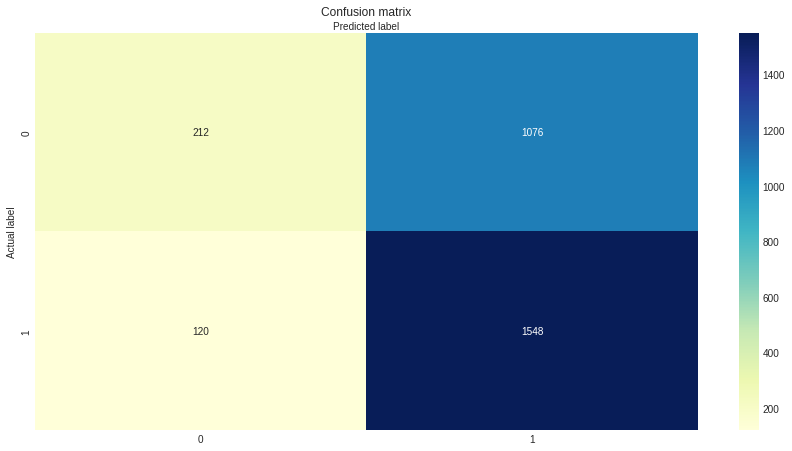

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5953991880920162
Precision: 0.5899390243902439
Recall: 0.9280575539568345


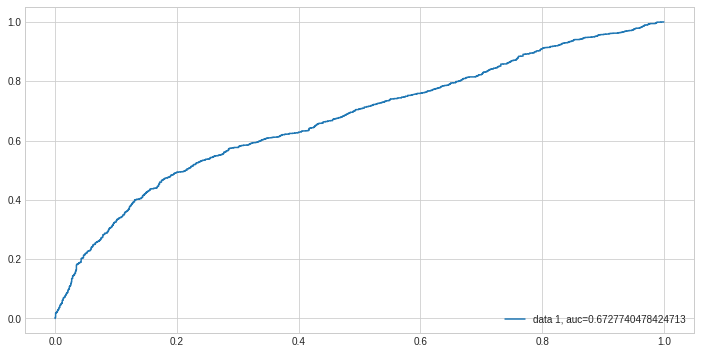

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now Making Predictions on New Data Set

In [31]:
#Now Loading Test Data
#Reading xlsx FILE
cf = pd.read_excel('/content/drive/My Drive/Project_Seminar/Test/HoldoutUKSocial.xlsx')
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4594 non-null   int64  
 1   Keywords            4594 non-null   object 
 2   Years               4594 non-null   int64  
 3   Months              4594 non-null   int64  
 4   impact_blog         4594 non-null   float64
 5   impact_forum        4594 non-null   float64
 6   impact_news         4594 non-null   float64
 7   impact_review       4594 non-null   float64
 8   impact_twitter      4594 non-null   float64
 9   twitter retweets    4594 non-null   int64  
 10  instagram likes     4594 non-null   int64  
 11  sentiment_negative  4594 non-null   int64  
 12  sentiment_neutral   4594 non-null   int64  
 13  sentiment_positive  4594 non-null   int64  
 14  full text           4594 non-null   object 
 15  hashtags            4594 non-null   object 
 16  media 

In [32]:
##We want to see the columns which has atleast 2 and above observations 
CMM = cf.dropna(axis='columns', thresh = 2)

In [33]:
# Drop the 'Unnamed: 0', 'full text', 'hashtags' and 'media urls' columns
CMM.drop(['Unnamed: 0', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
CMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            4594 non-null   object 
 1   Years               4594 non-null   int64  
 2   Months              4594 non-null   int64  
 3   impact_blog         4594 non-null   float64
 4   impact_forum        4594 non-null   float64
 5   impact_news         4594 non-null   float64
 6   impact_review       4594 non-null   float64
 7   impact_twitter      4594 non-null   float64
 8   twitter retweets    4594 non-null   int64  
 9   instagram likes     4594 non-null   int64  
 10  sentiment_negative  4594 non-null   int64  
 11  sentiment_neutral   4594 non-null   int64  
 12  sentiment_positive  4594 non-null   int64  
 13  country             4594 non-null   object 
 14  category            4594 non-null   object 
dtypes: float64(5), int64(7), object(3)
memory usage: 538.5+

In [34]:
#taking all variables for test
z_test = CMM.drop(['country', 'category', 'Keywords'], axis=1)
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Years               4594 non-null   int64  
 1   Months              4594 non-null   int64  
 2   impact_blog         4594 non-null   float64
 3   impact_forum        4594 non-null   float64
 4   impact_news         4594 non-null   float64
 5   impact_review       4594 non-null   float64
 6   impact_twitter      4594 non-null   float64
 7   twitter retweets    4594 non-null   int64  
 8   instagram likes     4594 non-null   int64  
 9   sentiment_negative  4594 non-null   int64  
 10  sentiment_neutral   4594 non-null   int64  
 11  sentiment_positive  4594 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 430.8 KB


In [35]:
#taking all variables and full data for test 
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (9853, 12)
'y' shape: (9853,)


In [36]:
X_train = X
y_train = y

In [37]:
#Create New Model 
logreg1 = LogisticRegression(max_iter=3000)

# fit the model with full data
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [38]:
predictions = logreg1.predict(z_test)

In [39]:
predictions1 = pd.DataFrame(predictions, columns=['trend'])
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trend   4594 non-null   uint8
dtypes: uint8(1)
memory usage: 4.6 KB


In [40]:
new_file = pd.concat([CMM, predictions1], axis =1)
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            4594 non-null   object 
 1   Years               4594 non-null   int64  
 2   Months              4594 non-null   int64  
 3   impact_blog         4594 non-null   float64
 4   impact_forum        4594 non-null   float64
 5   impact_news         4594 non-null   float64
 6   impact_review       4594 non-null   float64
 7   impact_twitter      4594 non-null   float64
 8   twitter retweets    4594 non-null   int64  
 9   instagram likes     4594 non-null   int64  
 10  sentiment_negative  4594 non-null   int64  
 11  sentiment_neutral   4594 non-null   int64  
 12  sentiment_positive  4594 non-null   int64  
 13  country             4594 non-null   object 
 14  category            4594 non-null   object 
 15  trend               4594 non-null   uint8  
dtypes: flo

In [ ]:
from google.colab import files
new_file.to_csv('file_name_UK_LG.csv') 
files.download('file_name_UK_LG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#SO FAR SO GOOD HERE WITH LOGISTIC

In [41]:
pip install xgboost

In [42]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [43]:
#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

Train Data Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.60      0.68      3061
           1       0.73      0.85      0.79      3836

    accuracy                           0.74      6897
   macro avg       0.75      0.73      0.73      6897
weighted avg       0.75      0.74      0.74      6897

Test Data Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.56      0.62      1265
           1       0.71      0.81      0.76      1691

    accuracy                           0.70      2956
   macro avg       0.70      0.68      0.69      2956
weighted avg       0.70      0.70      0.70      2956



[Text(90.5, 0.5, 'real values'),
 Text(0.5, 36.5, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

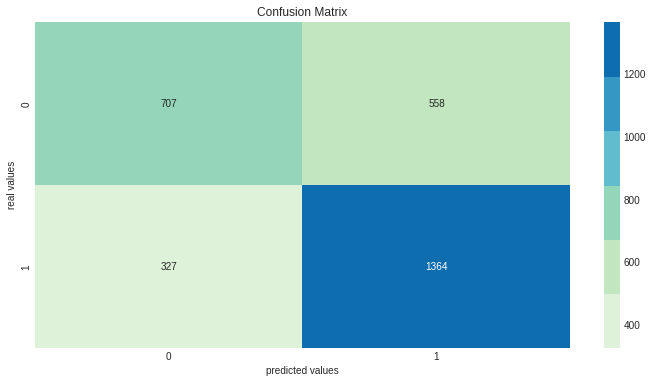

In [44]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [ ]:
##Gradient Boosting Work better

In [45]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (9853, 12)
'y' shape: (9853,)


In [46]:
#XGBoost
xgb_mdl1 = XGBClassifier().fit(X_train,y_train)
xgb_mdl1

XGBClassifier()

In [47]:
predictions_xgb = xgb_mdl1.predict(z_test)

In [48]:
predictions_xgb1 = pd.DataFrame(predictions_xgb, columns=['trend'])
predictions_xgb1

,trend
0,1
1,1
2,1
3,1
4,1
...,...
4589,0
4590,0
4591,1
4592,0


In [49]:
new_file_xgb = pd.concat([CMM, predictions_xgb1], axis =1)
new_file_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            4594 non-null   object 
 1   Years               4594 non-null   int64  
 2   Months              4594 non-null   int64  
 3   impact_blog         4594 non-null   float64
 4   impact_forum        4594 non-null   float64
 5   impact_news         4594 non-null   float64
 6   impact_review       4594 non-null   float64
 7   impact_twitter      4594 non-null   float64
 8   twitter retweets    4594 non-null   int64  
 9   instagram likes     4594 non-null   int64  
 10  sentiment_negative  4594 non-null   int64  
 11  sentiment_neutral   4594 non-null   int64  
 12  sentiment_positive  4594 non-null   int64  
 13  country             4594 non-null   object 
 14  category            4594 non-null   object 
 15  trend               4594 non-null   uint8  
dtypes: flo

In [ ]:
from google.colab import files
new_file_xgb.to_csv('new_file_UK_xgb.csv') 
files.download('new_file_UK_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Everything is good here

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn import datasets

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [52]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [53]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [54]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7456021650879567
LogisticRegression 0.6035182679296346
DecisionTreeClassifier 0.9918809201623816
VotingClassifier 0.8629905277401895


In [72]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, f1_score(y_test, y_pred))

KNeighborsClassifier 0.7853881278538813
LogisticRegression 0.7268065268065269
DecisionTreeClassifier 0.9928571428571429
VotingClassifier 0.8906292195517148


In [74]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, recall_score(y_test, y_pred))

KNeighborsClassifier 0.8137196924896511
LogisticRegression 0.92193968066233
DecisionTreeClassifier 0.9863985807214666
VotingClassifier 0.9751626256652868


In [77]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, precision_score(y_test, y_pred))

KNeighborsClassifier 0.7589630446773304
LogisticRegression 0.5998460946517892
DecisionTreeClassifier 0.9994008388256441
VotingClassifier 0.8195825049701789


In [ ]:
#Now Using Ensemble Modeling

In [56]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (9853, 12)
'y' shape: (9853,)


In [57]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [58]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [59]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(z_test)

In [60]:
#Ensembling
predictions_ensem = pd.DataFrame(y_pred, columns=['trend'])
predictions_ensem

,trend
0,1
1,1
2,1
3,1
4,1
...,...
4589,1
4590,1
4591,0
4592,0


In [61]:
new_file_ensem = pd.concat([CMM, predictions_ensem], axis =1)
new_file_ensem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            4594 non-null   object 
 1   Years               4594 non-null   int64  
 2   Months              4594 non-null   int64  
 3   impact_blog         4594 non-null   float64
 4   impact_forum        4594 non-null   float64
 5   impact_news         4594 non-null   float64
 6   impact_review       4594 non-null   float64
 7   impact_twitter      4594 non-null   float64
 8   twitter retweets    4594 non-null   int64  
 9   instagram likes     4594 non-null   int64  
 10  sentiment_negative  4594 non-null   int64  
 11  sentiment_neutral   4594 non-null   int64  
 12  sentiment_positive  4594 non-null   int64  
 13  country             4594 non-null   object 
 14  category            4594 non-null   object 
 15  trend               4594 non-null   uint8  
dtypes: flo

In [ ]:
from google.colab import files
new_file_ensem.to_csv('new_file_UK_ensem.csv') 
files.download('new_file_UK_ensem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# Filter out columns of our interest in ensem
pf_ensem = new_file_ensem.loc[:, ["Keywords", "trend"]]
pf_ensem

,Keywords,trend
0,Acai,1
1,Acai,1
2,Acai,1
3,Acai,1
4,Acai,1
...,...,...
4589,xeros washing machine,1
4590,xeros washing machine,1
4591,xeros washing machine,0
4592,xeros washing machine,0


In [63]:
# Filter out columns of our interest in xgb
pf_xgb = new_file_xgb.loc[:, ["Keywords", "trend"]]
pf_xgb

,Keywords,trend
0,Acai,1
1,Acai,1
2,Acai,1
3,Acai,1
4,Acai,1
...,...,...
4589,xeros washing machine,0
4590,xeros washing machine,0
4591,xeros washing machine,1
4592,xeros washing machine,0


In [64]:
# Filter out columns of our interest in xgb
pf_lg = new_file.loc[:, ["Keywords", "trend"]]
pf_lg

,Keywords,trend
0,Acai,1
1,Acai,1
2,Acai,1
3,Acai,1
4,Acai,1
...,...,...
4589,xeros washing machine,1
4590,xeros washing machine,1
4591,xeros washing machine,1
4592,xeros washing machine,1


In [65]:
result = pd.concat([pf_ensem, pf_xgb, pf_lg], axis=1)
result.columns = ['Keywords', 'ensem_trend', 'Keywords2', 'xgb_trend', 'Keywords3', 'lg_trend']
all_model = result.drop(['Keywords2', 'Keywords3'], axis=1)

In [66]:
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend
0,Acai,1,1,1
1,Acai,1,1,1
2,Acai,1,1,1
3,Acai,1,1,1
4,Acai,1,1,1
...,...,...,...,...
4589,xeros washing machine,1,0,1
4590,xeros washing machine,1,0,1
4591,xeros washing machine,0,1,1
4592,xeros washing machine,0,0,1


In [67]:
cols_to_sum = all_model.columns[ : all_model.shape[0]-0]
cols_to_sum
all_model['total_count'] = all_model[cols_to_sum].sum(axis=1)

In [68]:
# create a list of our conditions
conditions = [
    (all_model['total_count'] < 2),
    (all_model['total_count'] >= 2)
    ]
# create a list of the values we want to assign for each condition
values = ['no trend', 'trend']

# create a new column and use np.select to assign values to it using our lists as arguments
all_model['trend?'] = np.select(conditions, values)

# display updated DataFrame
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend,total_count,trend?
0,Acai,1,1,1,3,trend
1,Acai,1,1,1,3,trend
2,Acai,1,1,1,3,trend
3,Acai,1,1,1,3,trend
4,Acai,1,1,1,3,trend
...,...,...,...,...,...,...
4589,xeros washing machine,1,0,1,2,trend
4590,xeros washing machine,1,0,1,2,trend
4591,xeros washing machine,0,1,1,2,trend
4592,xeros washing machine,0,0,1,1,no trend


In [69]:
all_model1 = all_model.groupby(['Keywords'])['trend?'].agg(pd.Series.mode).reset_index()

In [70]:
from google.colab import files
all_model1.to_csv('all_model1.csv') 
files.download('all_model1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**That's all folks**